## Init

In [1]:
import matplotlib
# matplotlib.use("Agg")

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
import mymodels
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

from keras.callbacks import TensorBoard
from keras.optimizers import SGD
from keras.optimizers import Adam
from collections import Counter
from utils.conf_matrix import plot_confusion_matrix as cm
import operator
import matplotlib.pyplot as plt
import numpy as np
import datetime
import argparse
import time 
import os


Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
def init_model(model_file):
    print("[INFO] compiling model...")
    counter = Counter(valid_generator.classes)                          

    finalAct = 'softmax'
    #weights = 'pretrained_models/cells5_adam_noaug.h5'
    model = MODEL.build(
        width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
        depth=IMAGE_DIMS[2], classes=len(counter),
        finalAct=finalAct)


    model.load_weights(model_file)

    INIT_LR = 1e-4   #((1e-3 - 1e-4) / 2) + 1e-3
    DECAY = 1e-6
    opt = Adam(lr=INIT_LR, beta_1=0.9, beta_2=0.999, decay=DECAY, amsgrad=False)
    # compile the model
    model.compile(opt,loss="categorical_crossentropy",metrics=["accuracy"])
    
    return model


In [3]:
def get_conf_matrix(model_file, steps=1):
    model = init_model(model_file)
    print('[INFO] predicting generator')
    Y_pred = model.predict_generator(valid_generator,steps=steps)
    y_pred = np.argmax(Y_pred, axis=1)
    sorted_x = sorted(valid_generator.class_indices.iteritems(), key=operator.itemgetter(1))
    class_labels = []
    for (label,key) in sorted_x:
        class_labels.append(label) 
    c = confusion_matrix(valid_generator.classes, y_pred)
    plt.figure()
    cm(c, classes=class_labels,title='Confusion matrix')
    plt.show()
    print('[INFO] evaluating generator')
    score = model.evaluate_generator(valid_generator,steps=steps)
    print('Accuracy : ' + str(score[1]) + 'Loss : ' + str(score[0]))
    del model

## Column : Classification

Found 528 images belonging to 8 classes.
[INFO] compiling model...
[INFO] predicting generator
Confusion matrix, without normalization
[[ 15   4   0   3   0   0   0   1]
 [  2 113   7   1  17   7   2  17]
 [  0   4  19   0   6   0   0   1]
 [  1   1   0  44   0   0   0   0]
 [  1   9   4   0   7   4   2   3]
 [  0   4   0   0   1  32   1   1]
 [  0   3   0   0   1   0   0   0]
 [  1  27   0   0   9   6   0 147]]


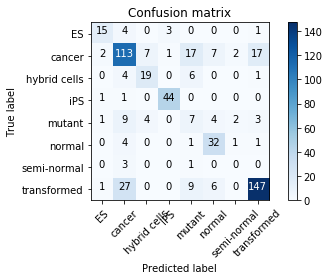

[INFO] evaluating generator
Accuracy : 0.7140151262283325Loss : 1.4459011554718018


In [17]:

BASE_PATH_IMG = 'cell_image/aug_images2'
column = 'Classification'
TRAIN_DIR = os.path.sep.join([BASE_PATH_IMG,column,'train'])
VAL_DIR = os.path.sep.join([BASE_PATH_IMG,column,'validation'])
num_images = sum([len(files) for r, d, files in os.walk(VAL_DIR)])

BS = num_images # int(num_images / steps ) 

IMAGE_DIMS = (128, 128, 3)

val_datagen=ImageDataGenerator(rescale=1./255.)

valid_generator=val_datagen.flow_from_directory(
directory=VAL_DIR,
batch_size=BS,
shuffle=False,  #Very important or predict generator would not coincice with conf matrix
class_mode="categorical",
target_size=(IMAGE_DIMS[0],IMAGE_DIMS[1]))

model_file = os.path.sep.join(['checkpoints',column, 'VGG19_29-0.73_aug2.hdf5']) 
MODEL =  mymodels.VGG19_frozen.VGG19
get_conf_matrix(model_file)

## Column : Morphology

Found 510 images belonging to 5 classes.
[INFO] compiling model...
[INFO] predicting generator
Confusion matrix, without normalization
[[ 62   7   0   0   0]
 [  1  85  21   4   5]
 [  2  34  61   0   2]
 [  0   0   0   1   8]
 [  0   4   0  13 200]]


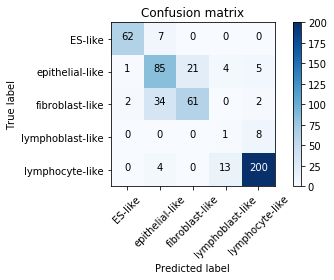

[INFO] evaluating generator
Accuracy : 0.8019607663154602Loss : 0.588664710521698


In [20]:
BASE_PATH_IMG = 'cell_image/aug_images2'
column = 'Morphology'
TRAIN_DIR = os.path.sep.join([BASE_PATH_IMG,column,'train'])
VAL_DIR = os.path.sep.join([BASE_PATH_IMG,column,'validation'])
num_images = sum([len(files) for r, d, files in os.walk(VAL_DIR)])

BS = num_images # int(num_images / steps ) 

IMAGE_DIMS = (128, 128, 3)

val_datagen=ImageDataGenerator(rescale=1./255.)

valid_generator=val_datagen.flow_from_directory(
directory=VAL_DIR,
batch_size=BS,
shuffle=False,  #Very important or predict generator would not coincice with conf matrix
class_mode="categorical",
target_size=(IMAGE_DIMS[0],IMAGE_DIMS[1]))

model_file = os.path.sep.join(['checkpoints',column, 'VGG19MorphologyAug2_11-0.84.hdf5']) 
MODEL =  mymodels.VGG19_frozen.VGG19
get_conf_matrix(model_file)

## Column: Lifespan

Found 561 images belonging to 2 classes.
[INFO] compiling model...
[INFO] predicting generator
Confusion matrix, without normalization
[[ 32   4]
 [ 28 497]]


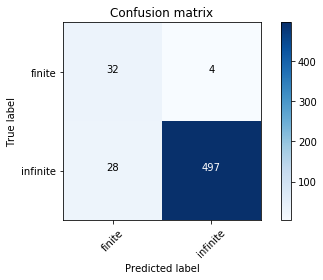

[INFO] evaluating generator
Accuracy : 0.9429590106010437Loss : 0.31684330105781555


In [4]:
BASE_PATH_IMG = 'cell_image/aug_images2'
column = 'Lifespan'
TRAIN_DIR = os.path.sep.join([BASE_PATH_IMG,column,'train'])
VAL_DIR = os.path.sep.join([BASE_PATH_IMG,column,'validation'])
num_images = sum([len(files) for r, d, files in os.walk(VAL_DIR)])

BS = num_images # int(num_images / steps ) 

IMAGE_DIMS = (128, 128, 3)

val_datagen=ImageDataGenerator(rescale=1./255.)

valid_generator=val_datagen.flow_from_directory(
directory=VAL_DIR,
batch_size=BS,
shuffle=False,  #Very important or predict generator would not coincice with conf matrix
class_mode="categorical",
target_size=(IMAGE_DIMS[0],IMAGE_DIMS[1]))

model_file = os.path.sep.join(['checkpoints',column, 'VGG19LifespanAug2_23-0.95.hdf5']) 
MODEL =  mymodels.VGG19_frozen.VGG19
get_conf_matrix(model_file)